## Exploratory Data Analysis

First, I need to import my required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Property df',index_col=0)
df.head()

,displayPrice,dateSold,tenure,newBuild,address,propertyType,bedrooms,images,hasFloorPlan,detailUrl,latitude,longitude
0,"£720,050",17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
1,"£445,000",12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,https://media.rightmove.co.uk/dir/66k/65394/10...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57167,-0.01677
2,"£643,756",9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
3,"£355,000",7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955
4,"£220,000",23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,https://media.rightmove.co.uk/dir/71k/70202/11...,True,https://www.rightmove.co.uk/house-prices/detai...,51.57082,-0.01955


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2277
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displayPrice  2278 non-null   object 
 1   dateSold      2278 non-null   object 
 2   tenure        2278 non-null   object 
 3   newBuild      2278 non-null   bool   
 4   address       2278 non-null   object 
 5   propertyType  2278 non-null   object 
 6   bedrooms      1588 non-null   float64
 7   images        2278 non-null   object 
 8   hasFloorPlan  2278 non-null   bool   
 9   detailUrl     1588 non-null   object 
 10  latitude      2278 non-null   float64
 11  longitude     2278 non-null   float64
dtypes: bool(2), float64(3), object(7)
memory usage: 200.2+ KB


# Cleaning the Data

To make certain columns usable I will need to correct data types and also handle missing values. I will also remove unnecessary columns that are unnecessary in the analysis. But first, I will rename the columns

In [4]:
rename_columns = ['Price','Date_Sold','Tenure_Type','New_Build','Address','Property_Type','Num_Bedrooms','Image_URL','Floorplan','URL','Latitude','Longitude']

df.columns = rename_columns

Removing the unnecessary columns: 'Image_URL' & 'URL'

In [5]:
df.drop(['Image_URL','URL'],axis=1,inplace=True)

I need to manipulate 'Price' and convert into an integer by removing the £ sign and comma and converting result into int

In [6]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].str.replace('£','')
df['Price'] = df['Price'].astype(int)

In [7]:
type(df['Price'][0])

numpy.int64

I want to now seperate 'Address' to two variables that are more useful to me: 'Post_Code' & 'Road_Name'

In [8]:
df['Post_Code'] = df['Address'].apply(lambda x: x[-7:])
df['Road_Name'] = df['Address'].apply(lambda x: x.split(',')[1])
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road


I also want to analyse properties by year sold so I will convert 'Date_Sold' to 'Year_Sold'

In [9]:
df['Year_Sold'] = df['Date_Sold'].apply(lambda x: x[-4:])
df['Year_Sold'] =df['Year_Sold'].astype(object)
df.head()

,Price,Date_Sold,Tenure_Type,New_Build,Address,Property_Type,Num_Bedrooms,Floorplan,Latitude,Longitude,Post_Code,Road_Name,Year_Sold
0,720050,17 Dec 2021,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2021
1,445000,12 Aug 2015,Freehold,False,"11, Whitney Road, London, Greater London E10 7HG",Terraced,3.0,True,51.57167,-0.01677,E10 7HG,Whitney Road,2015
2,643756,9 Dec 2021,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2021
3,355000,7 Sep 2007,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2007
4,220000,23 Mar 2006,Freehold,False,"82, Manor Road, Leyton, London, Greater London...",Terraced,4.0,True,51.57082,-0.01955,E10 7HN,Manor Road,2006


In [56]:
categorical_columns = ['Tenure_Type','Property_Type','New_Build','Floorplan']
df[categorical_columns] = df[categorical_columns].astype(object)

Looking through the frequency of the values in categorical features

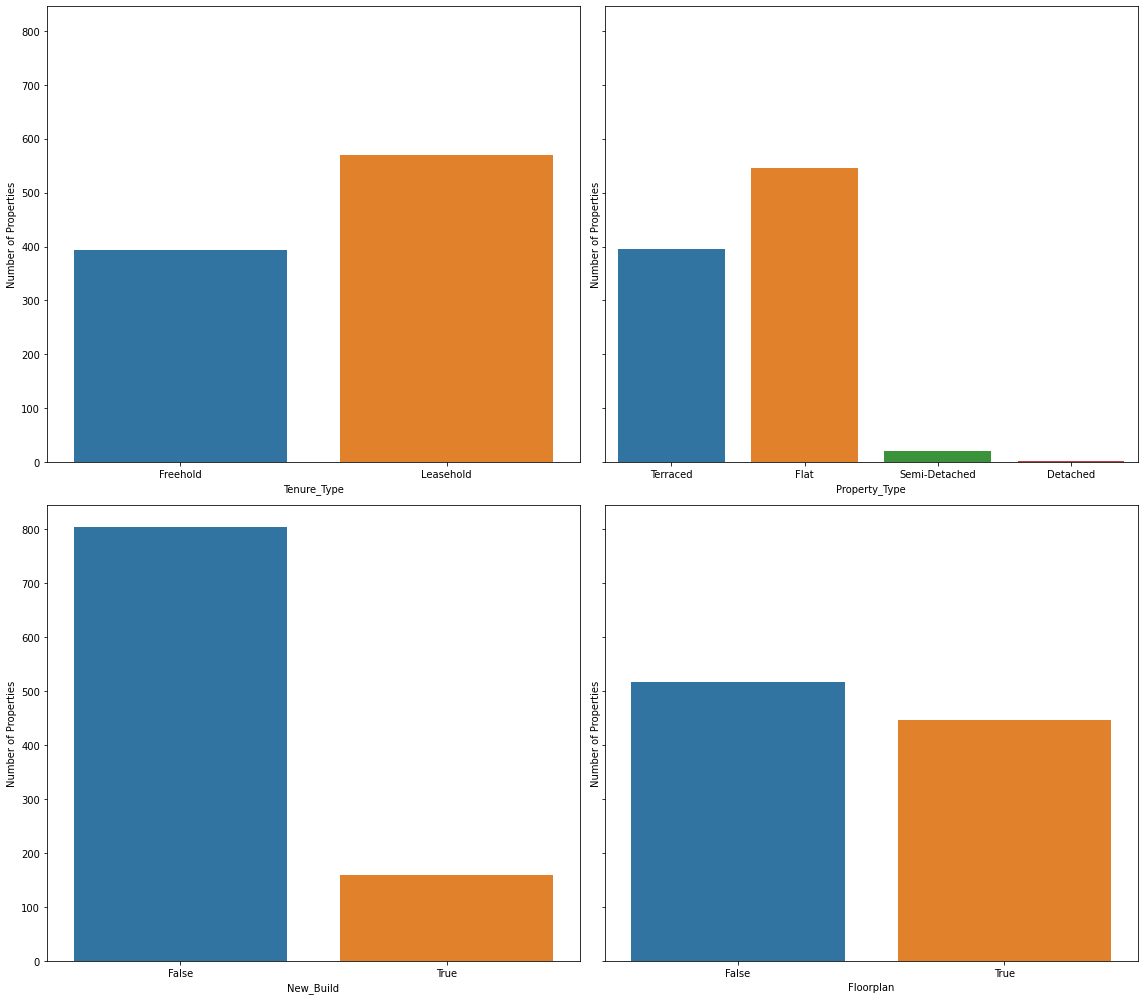

In [61]:
fig, axes = plt.subplots(2,2,figsize=(16,14), sharey=True)

for column, ax in zip(categorical_columns,axes.ravel()):
    sns.countplot(x=column,data=df.drop_duplicates(subset=['Address']),ax=ax)

    ax.set_ylabel('Number of Properties')



plt.tight_layout()

Renaming labels for some categories

In [62]:
df['New_Build'].replace({'False':'No','True':'Yes'},inplace=True)

df['Floorplan'].replace({'False':'No','True':'Yes'},inplace=True)

Checking for any missing values

In [63]:
df.isnull().sum()

Price              0
Date_Sold          0
Tenure_Type        0
New_Build          0
Address            0
Property_Type      0
Num_Bedrooms     690
Floorplan          0
Latitude           0
Longitude          0
Post_Code          0
Road_Name          0
Year_Sold          0
dtype: int64